In [1]:
#libraries
import os 
import pandas as pd
import numpy as np 
import h5py
import matplotlib.pyplot as plt
from tqdm import tqdm

#from google.colab import drive

In [2]:
# Read the daysim_outputs file
hdf_file = h5py.File(r'daysim_outputs.h5', "r")
hdf_file.keys()

<KeysViewHDF5 ['Household', 'HouseholdDay', 'Person', 'PersonDay', 'Tour', 'Trip']>

In [3]:
# Create functions to open the tables in daysim_outputs.h5
def h5_to_data_frame(h5file, table_name):
    table = h5file[table_name]
    col_dict = {}
    #cols = ['hhno', 'hhtaz']
    for col in table.keys():
        if col == 'sov_ff_time':
            pass
        else:
            my_array = np.asarray(table[col]).astype('int')
        col_dict[col] = my_array.astype('int')
    return(pd.DataFrame(col_dict))

In [4]:
# save modified tables back to (a new) h5 file
def df_to_h5(h5, df, group_name):

    f = h5py.File(h5, 'r+')
    grp = f.create_group(group_name)

    for column in df.columns:
        if column in ['travdist','travcost','travtime','trexpfac',
        'tautotime','tautocost','tautodist','toexpfac','hdexpfac'
        'pwautime','pwaudist', 'psautime','psaudist','psexpfac',
        'pdexpfac', 'hhexpfac'
        ]:
            grp.create_dataset(column, data=list(df[column].astype('float64')))
        else:
            grp.create_dataset(column, data=list(df[column].astype('int32')))

    print("Added to h5 container: " + str(group_name))

    f.close()
    

# get trips

In [5]:
trips = h5_to_data_frame(hdf_file, 'Trip')
trips.columns

Index(['arrtm', 'dadtyp', 'day', 'deptm', 'dorp', 'dpcl', 'dpurp', 'dtaz',
       'endacttm', 'half', 'hhno', 'id', 'mode', 'oadtyp', 'opcl', 'opurp',
       'otaz', 'pathtype', 'pno', 'sov_ff_time', 'tour', 'tour_id', 'travcost',
       'travdist', 'travtime', 'trexpfac', 'tseg', 'tsvid', 'vot'],
      dtype='object')

In [6]:
# trips = trips.loc[:, ['id', 'hhno', 'pno', 'day', 'tour', 'half', 'tseg', 'tsvid', 'mode', 'pathtype', 'dorp', 'otaz', 'dtaz', 'arrtm', 'deptm', 'travtime', 'travdist']]
trips = trips.loc[:, ['id', 'hhno', 'pno', 'day', 'tour', 'half', 'tseg', 'tsvid', 'mode', 'pathtype', 'dorp', 'otaz', 'dtaz', 'deptm', 'travtime', 'travdist']]

#### what is sov_ff_time?

### filter by mode and dorp

In [7]:
veh_trips = trips[trips['mode'].isin([3, 4, 5, 7, 9])]

In [8]:
veh_trips[veh_trips['pathtype'].isin([3,4,5,6,7])]

,id,hhno,pno,day,tour,half,tseg,tsvid,mode,pathtype,dorp,otaz,dtaz,deptm,travtime,travdist


In [9]:
veh_trips.groupby(['dorp']).agg(['count'])

,id,hhno,pno,day,tour,half,tseg,tsvid,mode,pathtype,otaz,dtaz,deptm,travtime,travdist
,count,count,count,count,count,count,count,count,count,count,count,count,count,count,count
dorp,,,,,,,,,,,,,,,
0,5838,5838,5838,5838,5838,5838,5838,5838,5838,5838,5838,5838,5838,5838,5838
1,9985425,9985425,9985425,9985425,9985425,9985425,9985425,9985425,9985425,9985425,9985425,9985425,9985425,9985425,9985425
2,3107156,3107156,3107156,3107156,3107156,3107156,3107156,3107156,3107156,3107156,3107156,3107156,3107156,3107156,3107156
11,84829,84829,84829,84829,84829,84829,84829,84829,84829,84829,84829,84829,84829,84829,84829
12,52449,52449,52449,52449,52449,52449,52449,52449,52449,52449,52449,52449,52449,52449,52449
13,31243,31243,31243,31243,31243,31243,31243,31243,31243,31243,31243,31243,31243,31243,31243


In [10]:
veh_trips.groupby(['mode']).agg(['count'])

,id,hhno,pno,day,tour,half,tseg,tsvid,pathtype,dorp,otaz,dtaz,deptm,travtime,travdist
,count,count,count,count,count,count,count,count,count,count,count,count,count,count,count
mode,,,,,,,,,,,,,,,
3,6771306,6771306,6771306,6771306,6771306,6771306,6771306,6771306,6771306,6771306,6771306,6771306,6771306,6771306,6771306
4,3745251,3745251,3745251,3745251,3745251,3745251,3745251,3745251,3745251,3745251,3745251,3745251,3745251,3745251,3745251
5,2581791,2581791,2581791,2581791,2581791,2581791,2581791,2581791,2581791,2581791,2581791,2581791,2581791,2581791,2581791
9,168592,168592,168592,168592,168592,168592,168592,168592,168592,168592,168592,168592,168592,168592,168592


In [11]:
veh_trips.groupby(['mode', 'dorp']).agg(['count'])

id     hhno      pno      day     tour     half     tseg  \
             count    count    count    count    count    count    count   
mode dorp                                                                  
3    0        2156     2156     2156     2156     2156     2156     2156   
     1     6769150  6769150  6769150  6769150  6769150  6769150  6769150   
4    0        1763     1763     1763     1763     1763     1763     1763   
     1     2183864  2183864  2183864  2183864  2183864  2183864  2183864   
     2     1559624  1559624  1559624  1559624  1559624  1559624  1559624   
5    0        1848     1848     1848     1848     1848     1848     1848   
     1     1032411  1032411  1032411  1032411  1032411  1032411  1032411   
     2     1547532  1547532  1547532  1547532  1547532  1547532  1547532   
9    0          71       71       71       71       71       71       71   
     11      84829    84829    84829    84829    84829    84829    84829   
     12      52449    52449    52449    52449    52449    52449    52449   
     13      31243    31243    31243    31243    31243    31243    31243   

             tsvid pathtype     otaz     dtaz    deptm travtime travdist  
             count    count    count    count    count    count    count  
mode dorp                                                                 
3    0        2156     2156     2156     2156     2156     2156     2156  
     1     6769150  6769150  6769150  6769150  6769150  6769150  6769150  
4    0        1763     1763     1763     1763     1763     1763     1763  
     1     2183864  2183864  2183864  2183864  2183864  2183864  2183864  
     2     1559624  1559624  1559624  1559624  1559624  1559624  1559624  
5    0        1848     1848     1848     1848     1848     1848     1848  
     1     1032411  1032411  1032411  1032411  1032411  1032411  1032411  
     2     1547532  1547532  1547532  1547532  1547532  1547532  1547532  
9    0          71       71       71       71       71       71       71  
     11      84829    84829    84829    84829    84829    84829    84829  
     12      52449    52449    52449    52449    52449    52449    52449  
     13      31243    31243    31243    31243    31243    31243    31243

From 16 milion rows of trip datafile around 13 milion are in modes: [3=sov, 4=hov 2, 5=hov 3+, 7=park and ride, 9=TNC]
and ~3 milion in modes:[1=walk, 2=bike, 6=walk to transit, 8=school bus, 10=other – survey only]

out of 13266940 rows:
- 5838 rows (0.04%) have dorp=0. we will remove them
- No one uses mode=7 (park and ride)
- mode=9 (TNC) includes 168592 (1.3%) of rows and they don't have dorp=1 (driver role). Probably, drivers of ridehailing companies are inside modes = 3,4,5 and dorp=1. we simply remove mode=9 rows.
- for modes=4,5 we assume that identical trips with dorp=1 are duplicated in rows with dorp=2. So we remove rows with dorp=2

#### Overall, we only work with rows with dorp=1 and assume that those rows represent different trips (~10 million)

In [12]:
veh_trips = veh_trips[veh_trips['dorp']==1]

In [13]:
veh_trips.drop(columns=['mode', 'dorp', 'pathtype'], inplace=True)
veh_trips = veh_trips.reset_index(drop=True)

In [14]:
veh_trips

,id,hhno,pno,day,tour,half,tseg,tsvid,otaz,dtaz,deptm,travtime,travdist
0,25101,25,1,1,1,1,1,0,3591,3584,424,6,1
1,25151,25,1,1,1,2,1,0,3584,3591,960,6,1
2,23101,23,1,1,1,1,1,0,3592,3628,499,12,3
3,23151,23,1,1,1,2,1,0,3628,3592,530,13,3
4,7101,7,1,1,1,1,1,0,3594,2731,486,36,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9985420,-241867144,1605258,1,1,1,2,2,0,47,2200,1052,67,28
9985421,-241867143,1605258,1,1,1,2,3,0,2200,2199,1155,5,0
9985422,-241866194,1605258,2,1,1,1,1,0,2199,2198,615,13,1
9985423,-241866195,1605258,2,1,1,1,2,0,2198,2187,645,8,2


### some explorations




In [15]:
tazs = np.concatenate((veh_trips.otaz.values, veh_trips.dtaz.values))
tazs = np.sort(np.unique(tazs))
tazs

array([   1,    2,    3, ..., 3906, 3907, 3951])

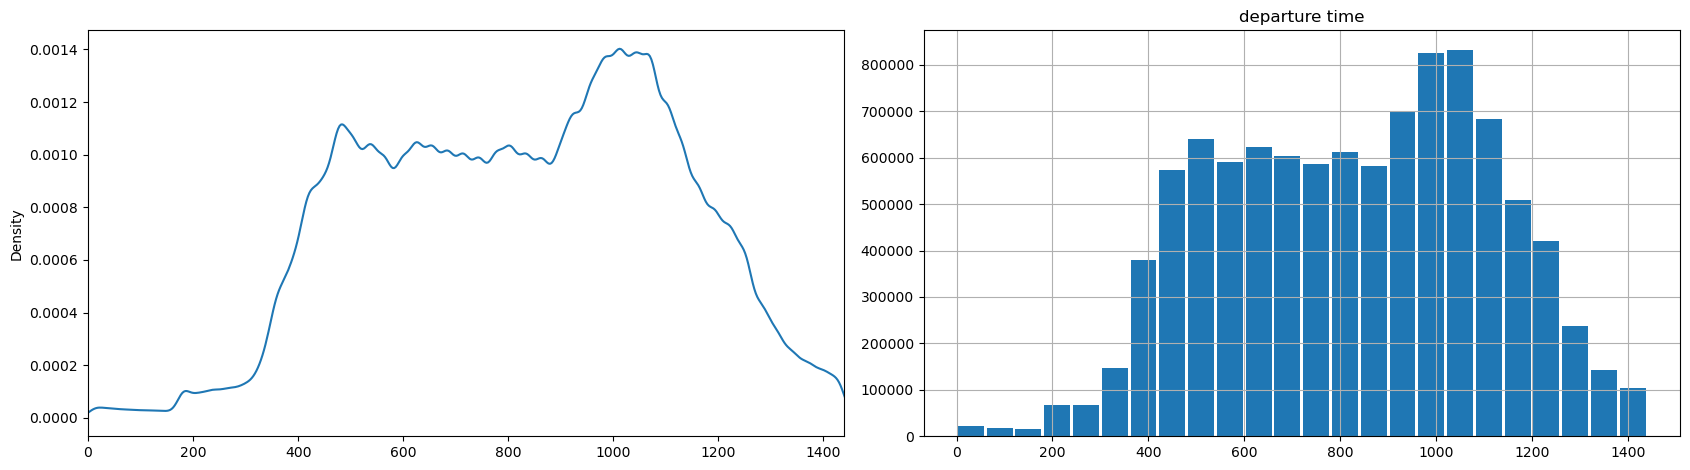

In [16]:
fig, axes = plt.subplots(1, 2)
plt.title('departure time')
fig.set_figwidth(17)
veh_trips.deptm.plot(ax=axes[0], kind='density').set_xlim([0, 1440])
veh_trips.deptm.hist(ax=axes[1], bins=24, rwidth=0.9)
plt.tight_layout()
plt.show()

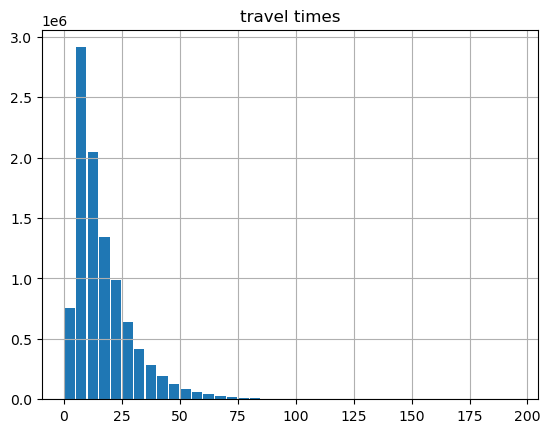

In [17]:
veh_trips.travtime.hist(bins=list(range(0,200,5)), rwidth=0.9)
plt.title('travel times')
plt.show()

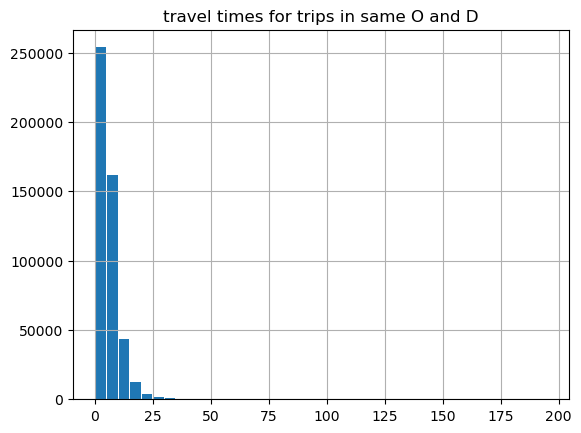

In [27]:
veh_trips[veh_trips.otaz == veh_trips.dtaz].travtime.hist(bins=list(range(0,200,5)), rwidth=0.9)
# veh_trips[abs(veh_trips.otaz - veh_trips.dtaz)<=2].travtime.hist(bins=list(range(0,200,5)), rwidth=0.9)
plt.title('travel times for trips in same O and D')
plt.show()

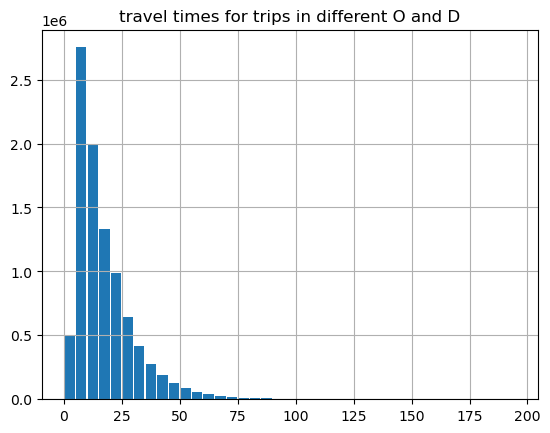

In [31]:
veh_trips[veh_trips.otaz!=veh_trips.dtaz].travtime.hist(bins=list(range(0,200,5)), rwidth=0.9)
# veh_trips[abs(veh_trips.otaz - veh_trips.dtaz)>2].travtime.hist(bins=list(range(0,200,5)), rwidth=0.9)

plt.title('travel times for trips in different O and D')
plt.show()

### removing useless info
I think that for our work, we do not need information other than otaz, dtaz, deptm, and maybe travel_time.


In [16]:
veh_trips.drop(columns=['id', 'hhno', 'pno', 'day', 'tour', 'half', 'tseg', 'tsvid', 'travdist'], inplace=True)

KeyError: "['id', 'hhno', 'pno', 'day', 'tour', 'half', 'tseg', 'tsvid', 'travdist'] not found in axis"

## making od table

Sorting makes things cleaner or maybe faster!

In [ ]:
sorted_trips = veh_trips.sort_values(by=['otaz', 'dtaz', 'deptm'])
sorted_trips.reset_index(drop=True, inplace=True)

In [ ]:
sorted_trips

In [ ]:
sorted_trips.to_csv('psrc_vehicle_trips.csv',index=False)

### after that, we will change TAZs and then run od2trips command. See other notebook files





##### rest is not important

...

### step1

#### od: 
we make dictionaries in which each key is a origin taz. Values would be a dictionary of dictionaries. Each dictionary has a destination taz as key and a np.array with length of 1440. 

- ex:

Two trips are generated from taz1 to taz1 at time= 1min, and three trips are generated from taz1 to taz2 at time=4min. 

we can have something like this:

od = {1:{1:[1, 1], 2:[4, 4, 4]}, 2:{...}, 3:{...}, ...}

#### od_simple and od_cplx:
they can be used to make .csv files like we previously had. 

For now, we focus on od_simple and will work on changing TAZs to psuedo TAZs. Later we will use od_cplx in which we account for departure time of each single vehicle trip
    

In [136]:
od = dict()
od_simple = {'O':[], 'D':[], 'demand':[]}
od_cplx = {'O':[], 'D':[], 'demand':[]}

for o in tqdm(tazs):
    o_df = sorted_trips[sorted_trips['otaz']== o]
    if len(o_df)>0:  
        # if we have trips started from this taz
        od[o] = dict()
        
        destinations = np.unique(o_df.dtaz.values)
        for d in destinations:
            od_df = o_df[o_df['dtaz'] == d]
            if len(od_df)>0:  
                # if we have trips started from o and ended in d
                times = od_df.deptm.values
                od[o][d] = times
             
                od_simple['O'].append(o)
                od_simple['D'].append(d)
                od_simple['demand'].append(len(times))
                
                od_cplx['O'].append(o)
                od_cplx['D'].append(d)
                od_cplx['demand'].append(times)  
            

100%|███████████████████████████████████████| 3835/3835 [03:12<00:00, 19.92it/s]


### step2
Making the .csv for od_simple. We can read this .csv file later during the developement instead of making the dataframe once again in other days

In [139]:
df = pd.DataFrame(od_simple)
df.to_csv('other_files/od_simple.csv', index=False)

In [143]:
len(df)

2259491